# Ejercicio: Reducción del dataset "Swiss roll" mediante técnicas no lineales

Dimensionality reduction  
Curso: Big data con Python (2019)  
Profesor: Steven Van Vaerenbergh  
Universidad de Cantabria  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# module for measuring execution times
from time import time

%matplotlib inline

# Generación de datos

In [2]:
# Generamos los datos (swiss roll dataset)
n_points = 1000
noise = 0.05
X, color = make_swiss_roll(n_points, noise)

# Lo hacemos más estrcho
X[:, 1] *= .5

# Visualización

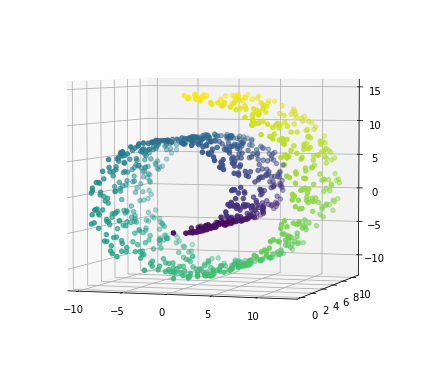

In [3]:
fig = plt.figure(figsize=(6, 5))

ax = Axes3D(fig, rect=[0, 0, .95, 1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.view_init(4, -72)

plt.show()

# a) Reducción de la dimensionalidad usando Isomap

In [20]:
# Parámetros de Isomap

n_neighbours = 20
n_components = 2

In [21]:
# Training de Isomap

t0 = time()

isomap = manifold.Isomap(n_neighbours, n_components)
Y_isomap = isomap.fit_transform(X)

t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))

Isomap: 1.3 sec


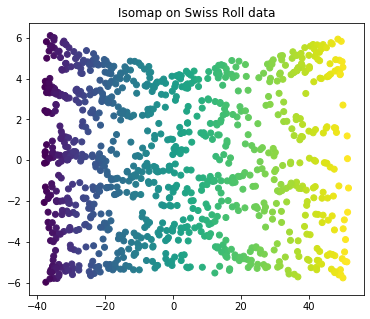

In [22]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("Isomap on Swiss Roll data")
plt.axis('tight')
plt.show()

# b) Reducción de la dimensionalidad usando LLE

In [17]:
# Parámetros de LLE
n_neighbours = 20
n_components = 2

In [14]:
?manifold.LocallyLinearEmbedding

In [28]:
# Training de LLE

t0 = time()

lle = manifold.LocallyLinearEmbedding(n_neighbours,n_components, random_state = 24, method = 'modified', eigen_solver='auto')
Y_lle = lle.fit_transform(X)
t1 = time()
print("LLE: %.2g seg" % (t1 - t0))

LLE: 0.56 seg


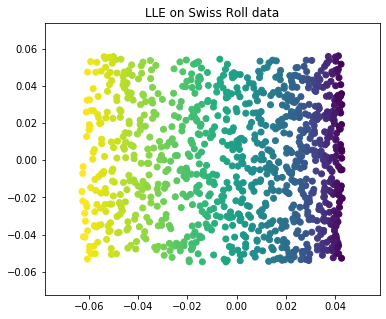

In [29]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_lle[:, 0], Y_lle[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("LLE on Swiss Roll data")
plt.axis('tight')
plt.show()

# c) Reducción de la dimensionalidad usando t-SNE

In [23]:
# Parámetros de t-SNE

n_components = 2

In [33]:
# Training de t-SNE

t0 = time()

tsne = manifold.TSNE(n_components, perplexity=10)
Y_tsne = tsne.fit_transform(X)

t1 = time()
print("t-SNE: %.2g seg" % (t1 - t0))

t-SNE: 10 seg


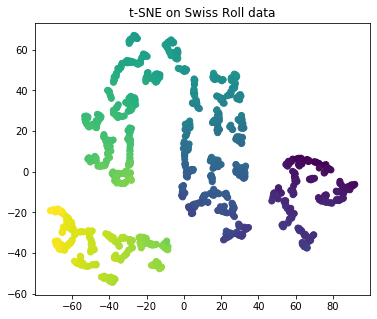

In [34]:
# Dibuja el resultado

fig = plt.figure(figsize=(6, 5))
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=color, cmap=plt.cm.viridis)
plt.title("t-SNE on Swiss Roll data")
plt.axis('tight')
plt.show()